In [1]:
import numpy as np 
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,random_split,Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [2]:
# train = pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/train.csv')
# test =pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/test.csv')
# val_size = int(0.2 * len(train))
# train_size=len(train)-val_size
# train, valid = random_split(train,[train_size, val_size])

In [3]:
cuda = True if torch.cuda.is_available() else False

In [4]:
train=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/train.csv")
test=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/test.csv")
train_x=train.drop(['id','y'],axis=1).values
train_y=train['y'].values


In [5]:
class FADataset(Dataset):
    def __init__(self, x,y):
        super().__init__()
        self.x=torch.tensor(x,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.float32)
        self.flag= [False] * len(self.x)
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        data=self.x[idx]
        target=self.y[idx]
        return data,target,idx

    def update_loss_value(self, idx):
        self.flag[idx] = True
        

In [6]:
batch_size=80
dataset=FADataset(train_x,train_y)
trainset, validset = random_split(dataset, [0.8, 0.2])
train_dl= DataLoader(trainset, shuffle=True, batch_size=batch_size)
valid_dl= DataLoader(validset, shuffle=True, batch_size=batch_size)
test_dl= DataLoader(test, shuffle=True, batch_size=batch_size)


In [7]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2,num_hidden3,num_hidden4, output_dim):
        super().__init__()
        self.model=nn.Sequential(nn.Linear(input_dim,num_hidden1),
                                nn.Linear(num_hidden1,num_hidden2),
                                nn.ReLU(True),
                                nn.Linear(num_hidden2,num_hidden3),
                                nn.ReLU(True),
                                nn.Linear(num_hidden3,num_hidden4),
                                nn.Linear(num_hidden4,output_dim)
                                )
    def forward(self, x):
        return self.model(x)


In [8]:
model= MLP(input_dim=2, num_hidden1=80,num_hidden2=128,num_hidden3=256,num_hidden4=128, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [9]:
num_epochs = 30
losses=[]
outlier_x= []
outlier_y= []
size = len(train_dl)
model.train()
for epoch in range(num_epochs):
    for batch,(data, target,idx) in enumerate(train_dl):
        outputs = model(data)
        loss = criterion(outputs, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 80 == 0: #每通過batch個數量的資料就輸出一次損失的值
            print(f"loss: {loss.item():>7f} ")
            losses.append(loss.item())


c:\Users\MJ\anaconda3\envs\MJ\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss: 1.587376 
loss: 0.163694 
loss: 0.146770 
loss: 0.161902 
loss: 0.123477 
loss: 0.149971 
loss: 0.130871 
loss: 0.120569 
loss: 0.137257 
loss: 0.153645 
loss: 0.139952 
loss: 0.147758 
loss: 0.153197 
loss: 0.133781 
loss: 0.139069 
loss: 0.170697 
loss: 0.150315 
loss: 0.155952 
loss: 0.137972 
loss: 0.140444 
loss: 0.157964 
loss: 0.154535 
loss: 0.151519 
loss: 0.158841 
loss: 0.154424 
loss: 0.148550 
loss: 0.181339 
loss: 0.126765 
loss: 0.137138 
loss: 0.162773 


In [10]:
model.eval()
for i in range(len(trainset)):
    outputs = model(trainset.dataset.x[i])
    loss = criterion(outputs,trainset.dataset.y[i])
    if(loss>0.17):
        trainset.dataset.update_loss_value(i)

c:\Users\MJ\anaconda3\envs\MJ\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


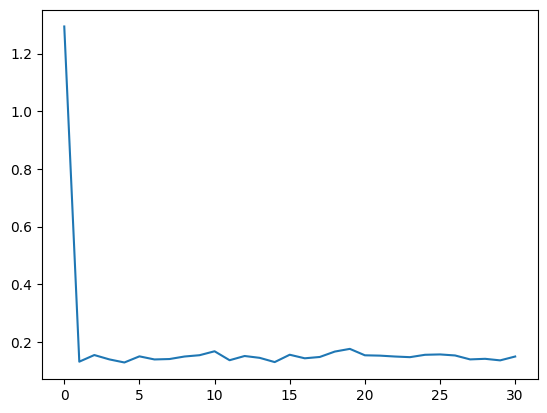

In [ ]:
plt.plot(losses)